<a href="https://colab.research.google.com/github/kimvongola/Self-Study-ML2/blob/main/Self_Study_ML2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

#https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand

In [60]:
dataset_cols=['bike_count','hour','temp','humidity','wind','invisibility','dew_pt_temp','radiation','rain','snow','functional']
df=pd.read_csv('SeoulBikeData2.csv').drop(['Date','Holiday','Seasons'],axis=1) #ignore the array specified and do it by each columns

In [61]:
df.columns=dataset_cols
df["functional"]=(df["functional"]=="Yes").astype(int)
df=df[df["hour"]==12]
df=df.drop(["hour"],axis=1)

In [62]:
df.head()

,bike_count,temp,humidity,wind,invisibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


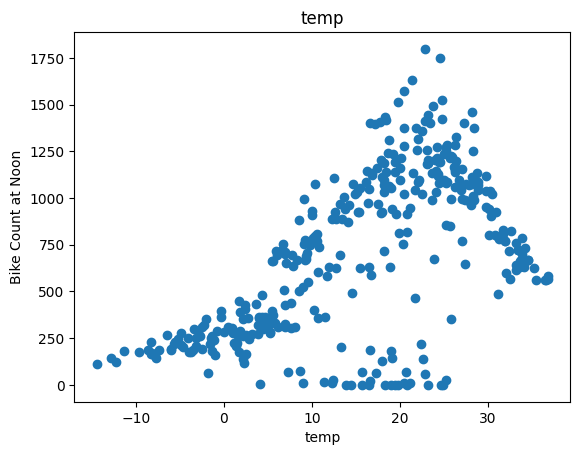

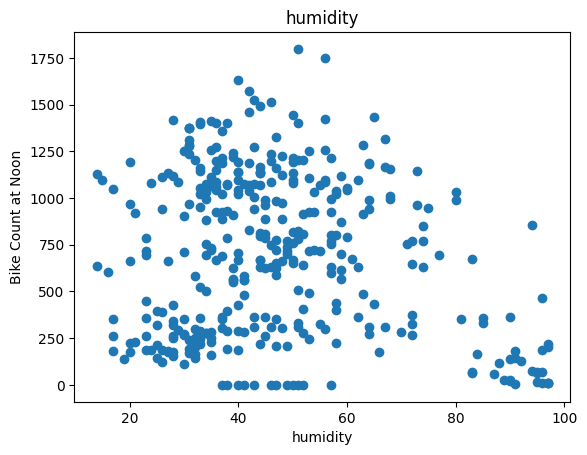

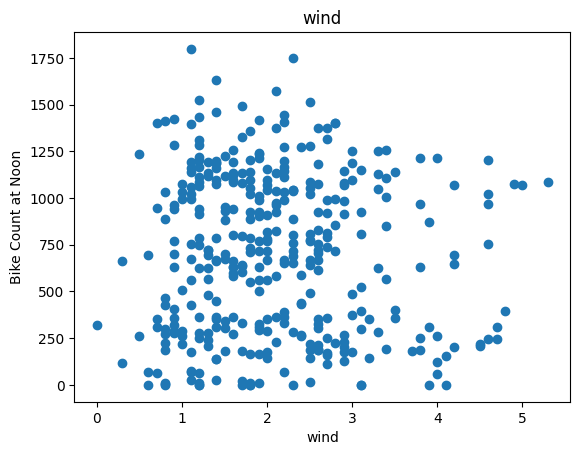

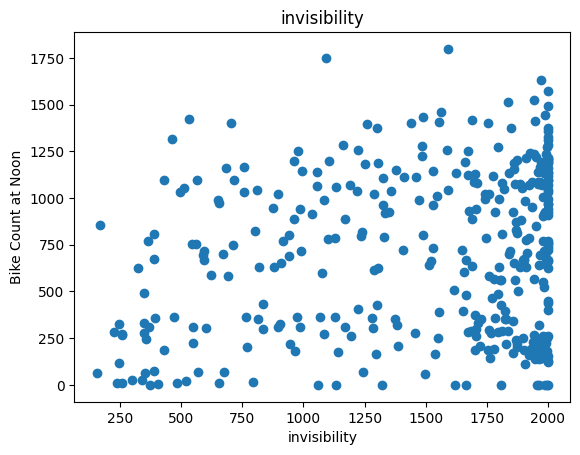

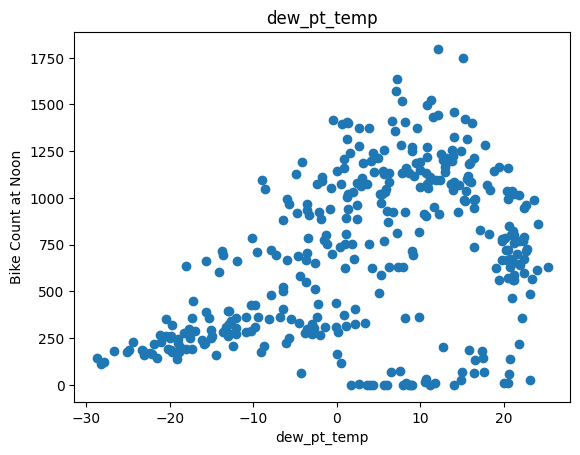

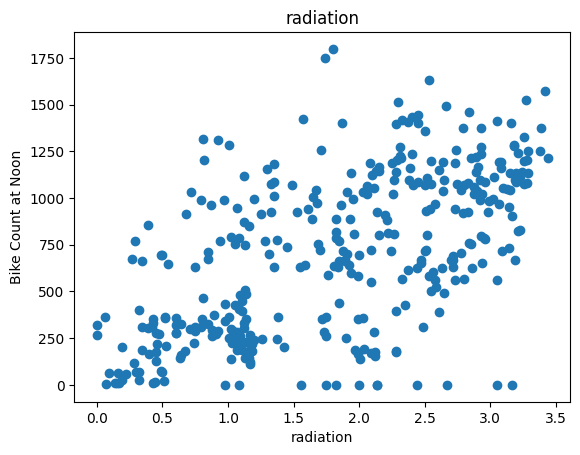

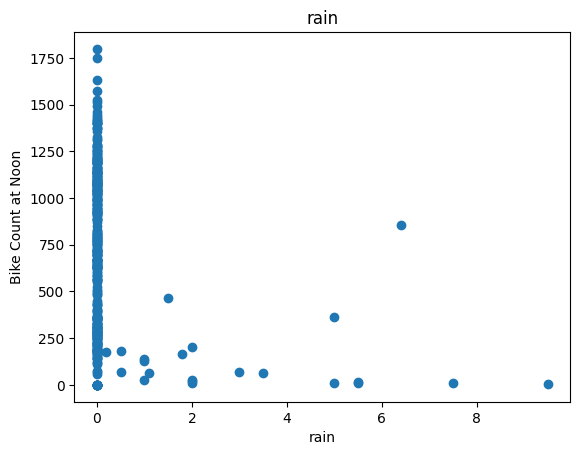

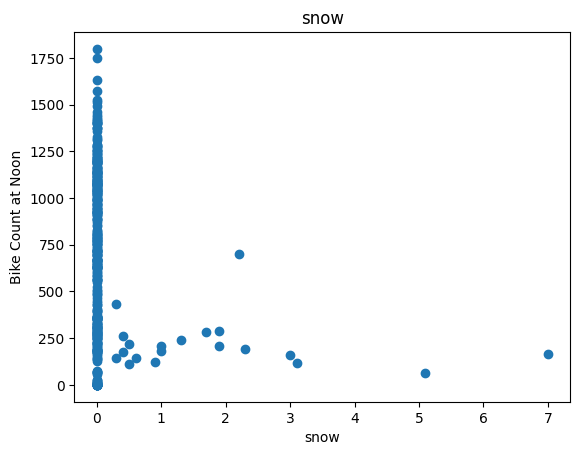

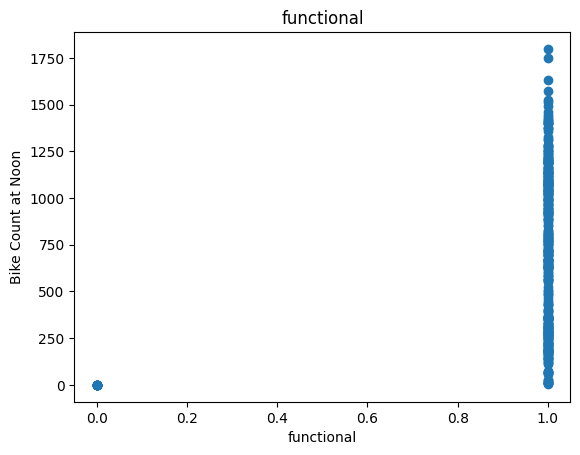

In [63]:
for label in df.columns[1:]:
  plt.scatter(df[label],df["bike_count"])
  plt.title(label)
  plt.ylabel("Bike Count at Noon")
  plt.xlabel(label)
  plt.show()

In [64]:
df=df.drop(["wind","invisibility","functional"],axis=1)

In [65]:
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


# Train/Valid/Test/Data set

In [66]:
train,val,test=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [67]:
def get_xy(dataframe,y_label,X_label=None):
  dataframe=copy.deepcopy(dataframe)
  if X_label is None:
    X=dataframe[[c for c in dataframe.columns if c!=y_label]].values
  else:
    if len(X_label)==1:
      X=dataframe[X_label[0]].values.reshape(-1,1) #reshape into 2D
    else:
      X=dataframe[X_label].values #Use specific data
  y=dataframe[y_label].values.reshape(-1,1)
  data=np.hstack((X,y))
  return data,X,y

In [68]:
_,X_train_temp,y_train_temp=get_xy(train,"bike_count",X_label=["temp"])
_,X_val_temp,y_val_temp=get_xy(val,"bike_count",X_label=["temp"])
_,X_test_temp,y_test_temp=get_xy(test,"bike_count",X_label=["temp"])

In [69]:
temp_reg=LinearRegression()
temp_reg.fit(X_train_temp,y_train_temp)

LinearRegression()

In [70]:
# print(temp_reg.coef_,temp_reg.intercept_)
temp_reg.score(X_train_temp,y_train_temp)

0.3733939035442597

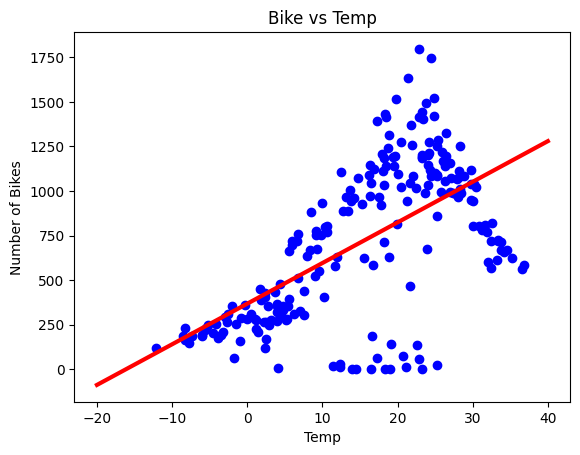

In [71]:
plt.scatter(X_train_temp,y_train_temp,label="Data",color="blue")
x=tf.linspace(-20,40,100)
plt.plot(x,temp_reg.predict(np.array(x).reshape(-1,1)),label="Fit",color="red",linewidth=3)
plt.legend
plt.title("Bike vs Temp")
plt.ylabel("Number of Bikes")
plt.xlabel("Temp")
plt.show()

#Multiple Linear Regression

In [72]:
train,val,test=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])
_,X_train_all,y_train_all=get_xy(train,"bike_count",X_label=df.columns[1:])
_,X_val_all,y_val_all=get_xy(val,"bike_count",X_label=df.columns[1:])
_,X_test_all,y_test_all=get_xy(test,"bike_count",X_label=df.columns[1:])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [73]:
all_reg=LinearRegression()
all_reg.fit(X_train_all,y_train_all)

LinearRegression()

In [74]:
all_reg.score(X_test_all,y_test_all)

0.48664761330087547

#Regression with neural net

In [83]:
def plot_loss(history):
  plt.plot(history.history['loss'],label='loss')
  plt.plot(history.history['val_loss'],label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

In [75]:
temp_normalizer=tf.keras.layers.Normalization(input_shape=(1,),axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [76]:
temp_nn_model=tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)#1 Node=Linear
])

In [77]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),loss='mean_squared_error')

In [80]:
history=temp_nn_model.fit(
    X_train_temp.reshape(-1),y_train_temp,
    verbose=0,
    epochs=1000,
    validation_data=(X_val_temp,y_val_temp)
)

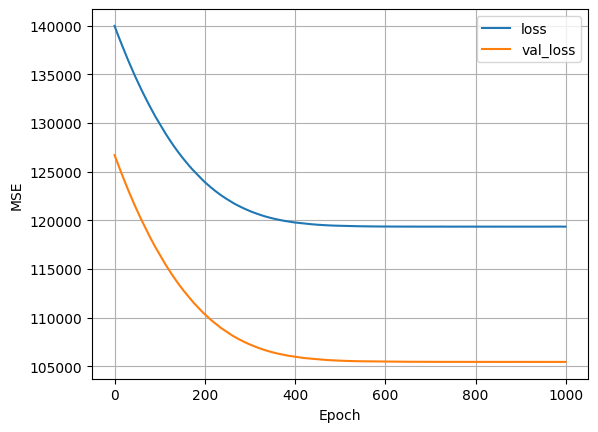

In [85]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


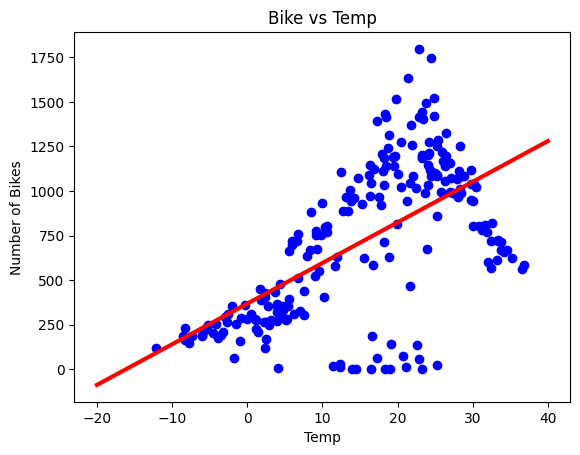

In [86]:
plt.scatter(X_train_temp,y_train_temp,label="Data",color="blue")
x=tf.linspace(-20,40,100)
plt.plot(x,temp_nn_model.predict(np.array(x).reshape(-1,1)),label="Fit",color="red",linewidth=3)
plt.legend
plt.title("Bike vs Temp")
plt.ylabel("Number of Bikes")
plt.xlabel("Temp")
plt.show()